# COGS 108 - A Home for Every Paw: Examining the Associations Between Pet Characteristics and Adoption Speed

### Video Link: https://drive.google.com/file/d/18oVWoP-7ARDOBbw3KUPDLkH2ARqlW8tV/view?usp=sharing

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

This project aimed to investigate the associations between pet characteristics (age, breed, color, and health condition) and adoption speed. The analysis revealed that younger and healthier pets had a faster adoption speed, while no significant differences were found between purebred and mixed-breed pets or pure-colored and multi-colored pets. Interestingly, white pets were adopted more quickly than non-white pets. These findings provide insights into the factors that affect pet adoption rates, which can help shelters and organizations improve their strategies to find homes for all animals in need.

# Names

- Yuyang Pang
- Chung-Ta Huang
- Sandy Wu
- Ada Qi

<a id='research_question'></a>
# Research Question

Are there any associations between the characteristics of a pet (age, breed, color, and health condition) and its adoption speed, and if so, which characteristics are associated with faster or slower adoption speed?

<a id='background'></a>

## Background & Prior Work

The adoption of pets, especially dogs and cats, is a popular phenomenon across the world. Understanding the factors that influence the adoption speed of pets can help animal shelters and rescues improve their adoption strategies and increase the likelihood of finding homes for these animals. Many studies have been conducted on this topic, exploring various factors that affect the adoption speed of pets. Dorion (2020) analyzed that certain dog breeds, such as pit bulls, were more difficult to adopt due to negative stereotypes and public perceptions [1]. Murphy's (2022) described "Black Dog/Cat Syndrome," which refers to the tendency of people to favor pets with lighter-colored fur over those with dark coat colors, indicating that physical characteristics like coat color can impact pet adoption speed [2]. In addition to physical characteristics, other factors that may impact adoption speed include age and health condition of the pet. For example, Joyce (2021) found that older dogs and dogs with health problems often experienced longer wait times before adoption [3]. Overall, while there has been some prior research on the topic of pet adoption speed, there is still much to be explored. This project aims to build upon previous work by examining a range of characteristics and their associations with adoption speed in a more comprehensive and nuanced manner. 

References:
1. https://wydaily.com/news/local/2020/01/08/notice-a-lot-of-pit-bulls-in-local-shelters-heres-why 
2. https://www.thesprucepets.com/black-dog-syndrome-4796374
3. https://pet-pardon.com/adoption-rates-significantly-lower-for-senior-pets-in-shelters

# Hypothesis


Our hypothesis suggests that there is a correlation between the adoption speed of a pet and its age, breed, color, and health conditions. We predict that pets that are younger, in good health, light-colored, and of pure breeds will have higher adoption speed.

# Dataset(s)

- Dataset Name: PetAdoption: train.csv
- Link to the dataset: https://www.kaggle.com/competitions/petfinder-adoption-prediction/data
- Number of observations: 14993

This dataset is found on Kaggle, it contains information about pets, including age, breed, color, health condition, and adoption speed.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pets = pd.read_csv('datasets/train.csv')

pets.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


# Data Cleaning

### Drop unrelated columns

We will be focusing solely on the following columns: `Age`, `Breed1`, `Breed2`, `Color1`, `Color2`, `Color3`, `Health`, and `AdoptionSpeed`. Therefore, we want to remove any unrelated columns.

In [3]:
## Drop unrelated columns
columns_to_drop = ['Type', 'Name', 'Gender', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized',
                  'Quantity', 'Fee', 'State', 'RescuerID', 'VideoAmt', 'Description', 'PetID', 'PhotoAmt']

pets = pets.drop(columns = columns_to_drop)

pets.head()

,Age,Breed1,Breed2,Color1,Color2,Color3,Health,AdoptionSpeed
0,3,299,0,1,7,0,1,2
1,1,265,0,1,2,0,1,0
2,1,307,0,2,7,0,1,3
3,4,307,0,1,2,0,1,2
4,1,307,0,1,0,0,1,2


### Data Fields

The meanings of each data field.

- `Age` - Age of pet when listed, in months
- `Breed1` - Primary breed of pet (Refer to BreedLabels dictionary)
- `Breed2` - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- `Color1` - Color 1 of pet (Refer to ColorLabels dictionary)
- `Color2` - Color 2 of pet (Refer to ColorLabels dictionary)
- `Color3` - Color 3 of pet (Refer to ColorLabels dictionary)
- `Health` - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- `AdoptionSpeed` - Categorical speed of adoption. Lower is faster.

### Convert `Health` to string

`Health` currently contains integer values (1, 2, 3) representing different health conditions (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury). To enhance readability, we aim to convert these values to strings.

In [4]:
health_condition = {
    1: 'Healthy',
    2: 'Minor Injury',
    3: 'Serious Injury'
}

pets['Health'] = pets['Health'].map(health_condition)

pets.head()

,Age,Breed1,Breed2,Color1,Color2,Color3,Health,AdoptionSpeed
0,3,299,0,1,7,0,Healthy,2
1,1,265,0,1,2,0,Healthy,0
2,1,307,0,2,7,0,Healthy,3
3,4,307,0,1,2,0,Healthy,2
4,1,307,0,1,0,0,Healthy,2


### Check null values

We would like to check if there are any null values in the dataset that need to be removed.

In [5]:
pets.isna().any()

Age              False
Breed1           False
Breed2           False
Color1           False
Color2           False
Color3           False
Health           False
AdoptionSpeed    False
dtype: bool

### Feature engineering

**Check if the pets are purebred or not**

To determine if the pets are purebred or not, we will add a new column called `Purebred` to the dataset. The `Breed2` column will be examined, and a value of 0 will represent purebred, while any non-zero value will represent mixed-breed.

We will record the purebred condition in `Purebred` as follows: 1 for purebred and 0 for mixed-breed.

In [6]:
def check_purebred(pets):
    if pets['Breed2'] == 0:
        return 1
    else:
        return 0
    
pets['Purebred'] = pets.apply(check_purebred, axis=1)

pets.head()

,Age,Breed1,Breed2,Color1,Color2,Color3,Health,AdoptionSpeed,Purebred
0,3,299,0,1,7,0,Healthy,2,1
1,1,265,0,1,2,0,Healthy,0,1
2,1,307,0,2,7,0,Healthy,3,1
3,4,307,0,1,2,0,Healthy,2,1
4,1,307,0,1,0,0,Healthy,2,1


**Check if the pets have pure color or not**

To determine if the pets have a pure color or not, we will add a new column called `PureColor` to the dataset. The `Color2` and `Color3` columns will be examined. If both `Color2` and `Color3` have a value of 0, it signifies that the pet has a pure color. If either `Color2` or `Color3` has a non-zero value, it indicates that the pet has a multi colours.

We will record the pure color condition in `PureColor` as follows: 1 for pets with a pure color and 0 for pets with multi colours.

In [7]:
def check_pure_color(pets):
    if pets['Color2'] == 0 and pets['Color3'] == 0:
        return 1
    else:
        return 0
    
pets['PureColor'] = pets.apply(check_pure_color, axis=1)

pets.head()

,Age,Breed1,Breed2,Color1,Color2,Color3,Health,AdoptionSpeed,Purebred,PureColor
0,3,299,0,1,7,0,Healthy,2,1,0
1,1,265,0,1,2,0,Healthy,0,1,0
2,1,307,0,2,7,0,Healthy,3,1,0
3,4,307,0,1,2,0,Healthy,2,1,0
4,1,307,0,1,0,0,Healthy,2,1,1


# Data Analysis & Results

## EDA

### Age and Adoption Speed

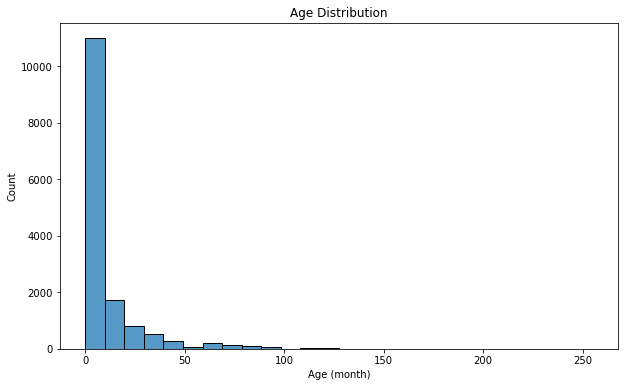

In [8]:
# Plot the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data=pets, x='Age', bins=26)
plt.title('Age Distribution')
plt.xlabel('Age (month)')
plt.ylabel('Count')
plt.show()

From the histogram, we tell that the `Age` column has a right-skewed distribution. Most of the pets are young, and the number of pets decreases as the age increases.

In [9]:
# find the statistics of age
pets['Age'].describe()

count    14993.000000
mean        10.452078
std         18.155790
min          0.000000
25%          2.000000
50%          3.000000
75%         12.000000
max        255.000000
Name: Age, dtype: float64

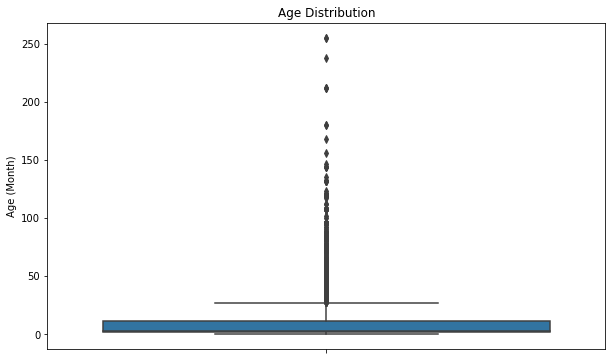

In [10]:
# Plot the boxplot of age
plt.figure(figsize=(10, 6))
sns.boxplot(data=pets, y='Age')
plt.title('Age Distribution')
plt.ylabel('Age (Month)')
plt.show()

From the boxplot, we tell that the median age of pets is 3 months old, and the majority of the pets are younger than 2 years old.

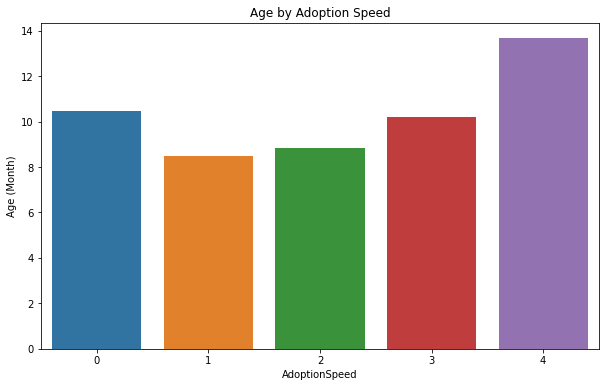

In [11]:
# Plot the adoption speed by age
plt.figure(figsize=(10, 6))
average_age = pets.groupby('AdoptionSpeed')['Age'].mean().reset_index()
sns.barplot(data=average_age, x='AdoptionSpeed', y='Age')
plt.title('Age by Adoption Speed')
plt.ylabel('Age (Month)')
plt.show()

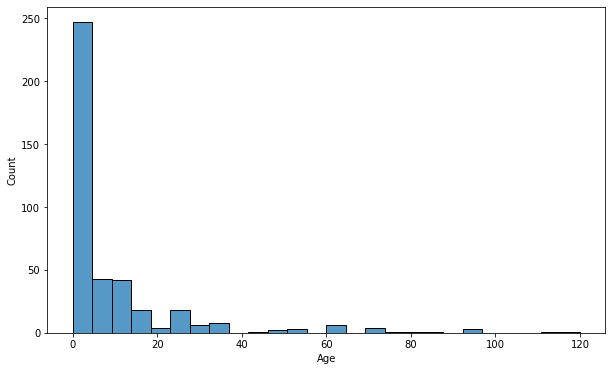

In [12]:
# Find the distribution of age for adoption speed 0
plt.figure(figsize=(10, 6))
pets_filtered = pets[pets['AdoptionSpeed']==0]
sns.histplot(data=pets_filtered, x='Age', bins=26)
plt.show()

However, it seems like the pets with highest adoption speed (0) are not affected by their age as they have the same age distribution as the overall population.

### Health and Adoption Speed

In [13]:
# Plot the distribution of Health.
health_counts = pets['Health'].value_counts().reset_index()
health_counts.columns = ['Health', 'Count']

health_counts

,Health,Count
0,Healthy,14478
1,Minor Injury,481
2,Serious Injury,34


In [14]:
total_pets = len(pets)

percentage_list = [(health, (count / total_pets) * 100) for health, count in health_counts.values]

for health, percentage in percentage_list:
    print(f"Percentage of {health}: {percentage:.2f}%")

Percentage of Healthy: 96.57%
Percentage of Minor Injury: 3.21%
Percentage of Serious Injury: 0.23%


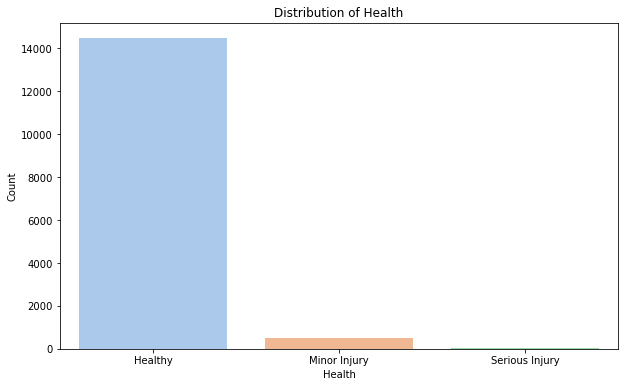

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=health_counts, x='Health', y='Count', palette='pastel')
plt.xlabel('Health')
plt.ylabel('Count')
plt.title('Distribution of Health')
plt.show()

Given that the number of pets with minor injury and serious injury is very low compared to the number of healthy pets, the adoption speed of pets with minor injury and serious injury may not provide a precise representation of the population mean and have large confidence interval compared to healthy pets.

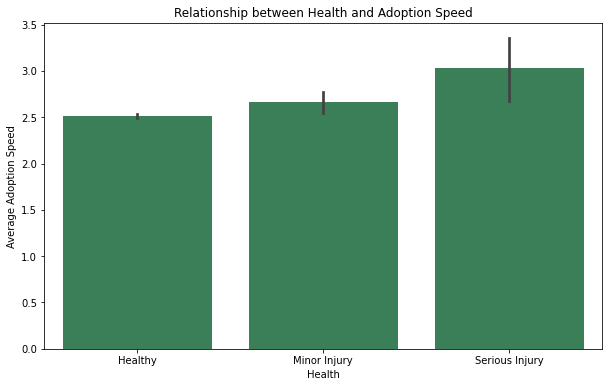

In [16]:
# Plot the relationship between Health and AdoptionSpeed
plt.figure(figsize=(10, 6))
sns.barplot(x=pets['Health'], y=pets['AdoptionSpeed'], color='seagreen')
plt.xlabel('Health')
plt.ylabel('Average Adoption Speed')
plt.title('Relationship between Health and Adoption Speed')
plt.show()

We can see that healthy pets have the fastest adoption speed, followed by pets with minor injury, and pets with serious injury have the slowest adoption speed.

### Breed and Adoption Speed

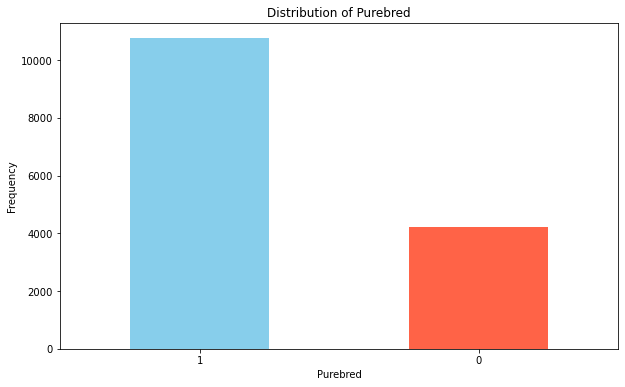

In [17]:
# Distribution Plot
plt.figure(figsize=(10,6))
pets['Purebred'].value_counts().plot(kind='bar', color=['skyblue', 'tomato'])
plt.title('Distribution of Purebred')
plt.xlabel('Purebred')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

From the previous we organized the breeds of pet to either 1 for purebred or 0 for mixed breed. From the above distribution plot shows that the pets in our data sets contains way more purebred pets than mixed.

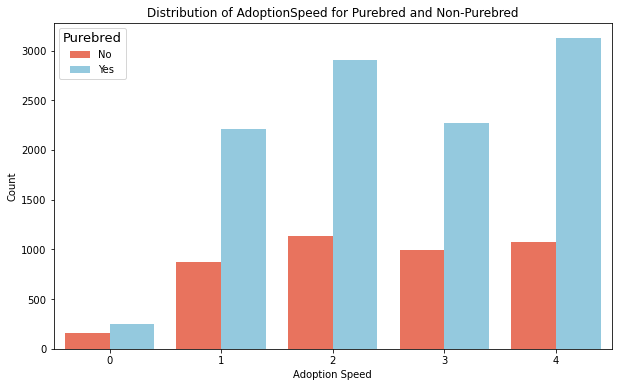

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='AdoptionSpeed', hue='Purebred', data=pets, palette=['tomato', 'skyblue'])
plt.title('Distribution of AdoptionSpeed for Purebred and Non-Purebred')
plt.xlabel('Adoption Speed')
plt.ylabel('Count')
plt.legend(title='Purebred', title_fontsize='13', labels=['No', 'Yes'])
plt.show()

For sure we are going to see the out raged bar of purebred pets since it has larger sample size, lets normalize it so the counts can be useful to see the relative proportions instead of raw counts.

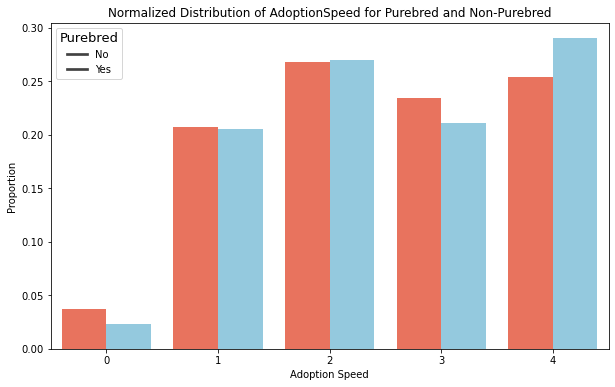

In [19]:
# Calculate proportions within each 'Purebred' category
purebred_grouped = pets[pets['Purebred'] == 1]['AdoptionSpeed'].value_counts(normalize=True).rename('proportion').reset_index()
non_purebred_grouped = pets[pets['Purebred'] == 0]['AdoptionSpeed'].value_counts(normalize=True).rename('proportion').reset_index()

purebred_grouped['Purebred'] = 1
non_purebred_grouped['Purebred'] = 0

grouped = pd.concat([purebred_grouped, non_purebred_grouped])

plt.figure(figsize=(10,6))
sns.barplot(x='index', y='proportion', hue='Purebred', data=grouped, palette=['tomato', 'skyblue'])
plt.title('Normalized Distribution of AdoptionSpeed for Purebred and Non-Purebred')
plt.xlabel('Adoption Speed')
plt.ylabel('Proportion')
plt.legend(title='Purebred', title_fontsize='13', labels=['No', 'Yes'])
plt.show()

First separate the data into purebred and non-purebred pets. Then results are combined into a single DataFrame, which is used to create the plot. With this plot, we can compare the proportion of each adoption speed between purebred and non-purebred pets. For the adoption speed 0(The fastest adoption speed), the proportion of mixed pets with a certain adoption speed is higher than that of purebred pets, this would indicate that mixed pets have a higher likelihood of that adoption speed.

### Colors and Adoption Speed

Text(0, 0.5, 'Color Count')

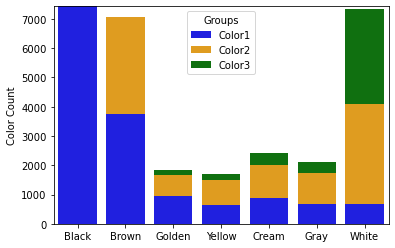

In [20]:
color1 = pets['Color1'].value_counts();
color2 = pets['Color2'].value_counts();
color3 = pets['Color3'].value_counts();

color2[1] = 0
color3[1] = 0
color3[2] = 0

color2 = color2.drop(labels=[0], axis=0, inplace=False)
color3 = color3.drop(labels=[0], axis=0, inplace=False)

color1 = color1.sort_index()
color2 = color2.sort_index()
color3 = color3.sort_index()

data = {'x': ['Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White'],
        'color1': color1,
        'color2': color2,
        'color3': color3}
sns.barplot(x='x', y='color1', data=data, color='blue', label='Color1')
sns.barplot(x='x', y='color2', data=data, bottom=color1, color='orange', label='Color2')
sns.barplot(x='x', y='color3', data=data, bottom=color1+color2, color='green', label='Color3')


plt.legend(title='Groups')
plt.ylabel('Color Count')

The bar plot represents the color distribution and its relationship with adoption speed for pets in the dataset. The x-axis shows different colors, including Black, Brown, Golden, Yellow, Cream, Gray, and White. The y-axis represents the count of pets with each color. The hue of the bars indicates the adoption speed categories.

From the plot, we can observe that the most common colors among the pets are Black, Brown, and White, while Golden, Yellow, Cream, and Gray are relatively less frequent. This indicates that pets with these colors are more commonly found in the dataset.

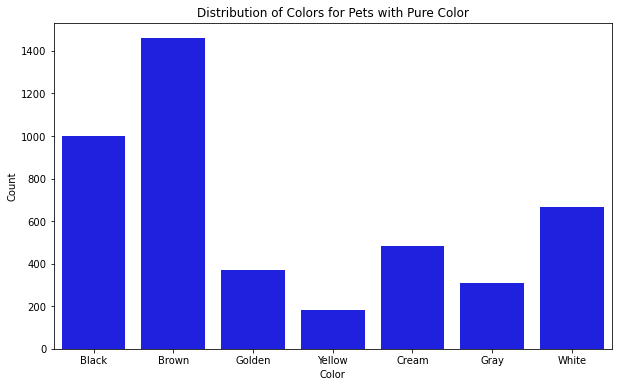

In [21]:
# Filter the DataFrame to include only pets with PureColor = 1
pure_color_pets = pets[pets['PureColor'] == 1]

# Get the Color1 column for pure color pets
color_data = pure_color_pets['Color1']

# Count the occurrences of each color
color_counts = color_data.value_counts().sort_index()

# Create a list of color names corresponding to the color values
color_names = ['Black', 'Brown', 'Golden', 'Yellow', 'Cream', 'Gray', 'White']

# Plot the count of each color
plt.figure(figsize=(10, 6))
sns.barplot(x=color_names, y=color_counts, color='blue')

plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Distribution of Colors for Pets with Pure Color')

plt.show()

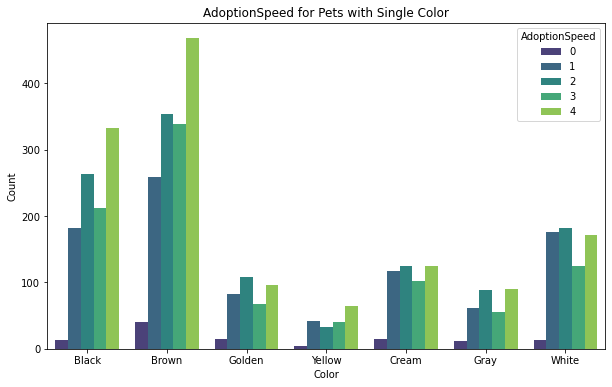

In [22]:
# Filter the DataFrame to include only pets with PureColor = 1 and Color2 and Color3 = 0
pure_color_pets = pets[(pets['PureColor'] == 1) & (pets['Color2'] == 0) & (pets['Color3'] == 0)]

# Get the Color1 and AdoptionSpeed columns for pure color pets
data = pure_color_pets[['Color1', 'AdoptionSpeed']]

# Count the occurrences of each color and adoption speed
counts = data.groupby(['Color1', 'AdoptionSpeed']).size().reset_index(name='Count')

# Plot the count of each AdoptionSpeed for each Color1
plt.figure(figsize=(10, 6))
sns.barplot(x='Color1', y='Count', hue='AdoptionSpeed', data=counts, palette='viridis')

plt.xlabel('Color')
plt.ylabel('Count')
plt.title('AdoptionSpeed for Pets with Single Color')
plt.xticks(range(len(color_names)), color_names)

plt.show()

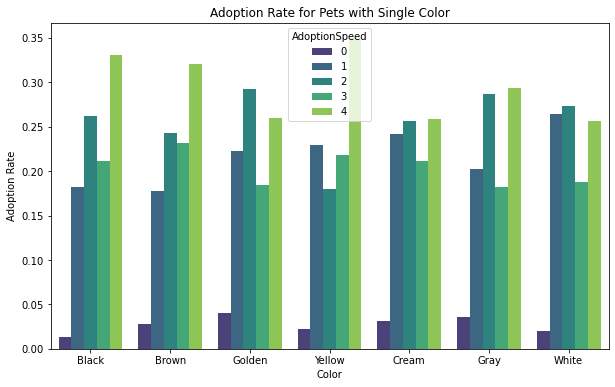

In [23]:
# Filter the DataFrame to include only pets with PureColor = 1 and Color2 and Color3 = 0
pure_color_pets = pets[(pets['PureColor'] == 1) & (pets['Color2'] == 0) & (pets['Color3'] == 0)]

# Get the Color1 and AdoptionSpeed columns for pure color pets
data = pure_color_pets[['Color1', 'AdoptionSpeed']]

# Count the occurrences of each color and adoption speed
counts = data.groupby(['Color1', 'AdoptionSpeed']).size().reset_index(name='Count')

# Calculate the total count of pets for each color
total_counts = counts.groupby('Color1')['Count'].sum()

# Calculate the adoption rate for each color and adoption speed
counts['AdoptionRate'] = counts.apply(lambda row: row['Count'] / total_counts[row['Color1']], axis=1)

# Plot the adoption rate for each AdoptionSpeed and Color1
plt.figure(figsize=(10, 6))
sns.barplot(x='Color1', y='AdoptionRate', hue='AdoptionSpeed', data=counts, palette='viridis')

plt.xlabel('Color')
plt.ylabel('Adoption Rate')
plt.title('Adoption Rate for Pets with Single Color')
plt.xticks(range(len(color_names)), color_names)

plt.show()

It is evident that the adoption rate varies across different colors and adoption speeds. The bar plot displays the adoption rate as the y-axis, representing the proportion of adopted pets within each color category and adoption speed.

For example, based on the information on the graph, it can be roughly seen that the gold and gray pets have a relatively higher adoption rate in the "0" (<1 day) period. On the other hand, "White" exhibits higher adoption rates in the "2" (8-30 days) and "3" (31-90 days) adoption speed categories among all "White" pets.

Overall, the plot demonstrates that there is a correlation between color and adoption rate for single-colored pets. Understanding these patterns can provide insights for shelters and adoption agencies, enabling them to make informed decisions and potentially facilitate the adoption process by considering the color preferences of potential adopters.

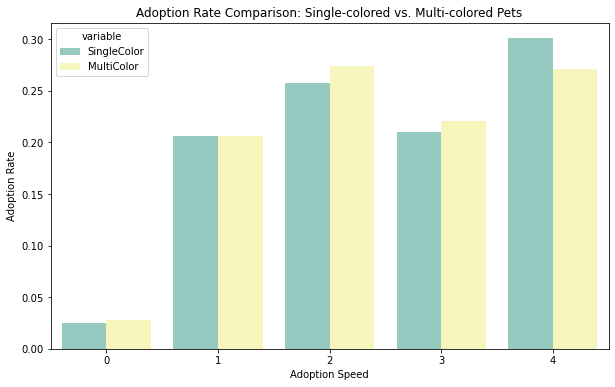

In [24]:
# Filter the DataFrame to include only pets with PureColor = 1 and Color2 and Color3 = 0 (single-colored pets)
single_color_pets = pets[(pets['PureColor'] == 1) & (pets['Color2'] == 0) & (pets['Color3'] == 0)]

# Filter the DataFrame to include only pets with PureColor = 0 or Color2 or Color3 != 0 (multi-colored pets)
multi_color_pets = pets[(pets['PureColor'] == 0) | (pets['Color2'] != 0) | (pets['Color3'] != 0)]

# Count the total number of single-colored and multi-colored pets
total_single_color_pets = len(single_color_pets)
total_multi_color_pets = len(multi_color_pets)

# Count the adoption speed occurrences for single-colored pets
single_color_counts = single_color_pets['AdoptionSpeed'].value_counts().sort_index()

# Count the adoption speed occurrences for multi-colored pets
multi_color_counts = multi_color_pets['AdoptionSpeed'].value_counts().sort_index()

# Calculate the adoption rate for single-colored pets
single_color_adoption_rate = single_color_counts / total_single_color_pets

# Calculate the adoption rate for multi-colored pets
multi_color_adoption_rate = multi_color_counts / total_multi_color_pets

# Create a DataFrame combining the adoption rates for single-colored and multi-colored pets
data = pd.DataFrame({'AdoptionSpeed': single_color_adoption_rate.index, 'SingleColor': single_color_adoption_rate.values, 'MultiColor': multi_color_adoption_rate.values})

# Plot the adoption rate comparison between single-colored and multi-colored pets
plt.figure(figsize=(10, 6))
sns.barplot(x='AdoptionSpeed', y='value', hue='variable', data=pd.melt(data, ['AdoptionSpeed']), palette='Set3')

plt.xlabel('Adoption Speed')
plt.ylabel('Adoption Rate')
plt.title('Adoption Rate Comparison: Single-colored vs. Multi-colored Pets')

plt.show()

In this chart, the difference of adoption rate of adoption speed between monochromatic and multicolor pets is not significant, and we can find that the rate of change of their adoption speed seems to be similar. These data need to be analyzed in more detail subsequently.

## Inference

To validate our hypothesis, we choose to perform permutation test on our dataset given that permutation tests do not require the normal assumptions for a t-test (like normal distribution of data and equal variances).

A permutation test is a type of statistical significance test in which the distribution of the test statistic under the null hypothesis is obtained by calculating all possible values of the test statistic under rearrangements of the labels on the observed data points.

In [25]:
cut_off_age = 6 # pets that are 6 months old or younger are young pets
cut_off_health = 1 # pets without any injuries are healthy pets
cut_off_purebred = 0 # cutoff for purebred
cut_off_pure_color = 0 # cutoff for pure color
cut_off_white = 6 # cutoff for white pets

In [26]:
def permutation_test(cut_off, col_name, df=pets, inverse_group=False):
    """
    Perform permutation test on the given DataFrame and return the p-value
    """
    # Split the data into two groups based on the cut-off
    group1 = df[df[col_name] <= cut_off]['AdoptionSpeed']
    group2 = df[df[col_name] > cut_off]['AdoptionSpeed']

    # Compute the observed difference in means
    observed_diff = np.mean(group1) - np.mean(group2)

    # Combine the datasets
    combined = np.concatenate([group1, group2])

    # Run the permutation test
    num_permutations = 10000
    count = 0
    np.random.seed(0)  # For reproducibility
    for _ in range(num_permutations):
        # Permute the combined array
        permuted = np.random.permutation(combined)

        # Split it into two parts
        permuted_group1 = permuted[:len(group1)]
        permuted_group2 = permuted[len(group1):]

        # Compute the test statistic
        permuted_diff = np.mean(permuted_group1) - np.mean(permuted_group2)

        # If the permuted difference is more extreme than the observed difference, add to the count
        if inverse_group:
            if permuted_diff >= observed_diff:
                count += 1

        else:
            if permuted_diff <= observed_diff:
                count += 1
    
    # Compute the p-value
    p_value = count / num_permutations

    return p_value

### Age and Adoption Speed

$ H_0: \mu_{\text{young}} = \mu_{\text{old}} $

$ H_1: \mu_{\text{young}} < \mu_{\text{old}} $

note: smaller adoption speed means faster

In [27]:
# perform permutation test on Age column
permutation_test(cut_off_age, 'Age')

0.0

Based on a p-value of 0.0, the analysis provides strong evidence to reject the null hypothesis and supports the alternative hypothesis, indicating that young pets have a significantly faster adoption speed compared to old pets.

### Health and Adoption Speed

$ H_0: \mu_{\text{healthy}} = \mu_{\text{injured}} $

$ H_1: \mu_{\text{healthy}} < \mu_{\text{injured}} $

note: smaller adoption speed means faster

In [28]:
# encode Health column
health_condition = {
    'Healthy': 1,
    'Minor Injury': 2,
    'Serious Injury': 3
}

new_pets = pets.copy()
new_pets['Health'] = new_pets['Health'].map(health_condition)

# perform permutation test on Health column
permutation_test(cut_off_health, 'Health', df=new_pets)

0.0005

Based on a p-value of 0.0005, the analysis provides strong evidence to reject the null hypothesis and supports the alternative hypothesis, indicating that healthy pets have a significantly faster adoption speed compared to injured pets.

### Breed and Adoption Speed

$ H_0: \mu_{\text{purebred}} = \mu_{\text{mixed-breed}} $

$ H_1: \mu_{\text{purebred}} < \mu_{\text{mixed-breed}} $

note: smaller adoption speed means faster

In [29]:
# perform permutation test on Purebred column
permutation_test(cut_off_purebred, 'Purebred', inverse_group=True)

0.9997

Based on the obtained p-value of 0.9997, our analysis fails to provide significant evidence to reject the null hypothesis. Therefore, we cannot conclude that there is a significant difference in adoption speed between purebred pets and mixed-breed pets.

### Color and Adoption Speed

$ H_0: \mu_{\text{pure-colored}} = \mu_{\text{multi-colored}} $

$ H_1: \mu_{\text{pure-colored}} < \mu_{\text{multi-colored}} $

note: smaller adoption speed means faster

In [30]:
# perform permutation test on PureColor column
permutation_test(cut_off_pure_color, 'PureColor', inverse_group=True)

0.9981

Based on the obtained p-value of 0.9981, our analysis fails to provide significant evidence to reject the null hypothesis. Therefore, we cannot conclude that there is a significant difference in adoption speed between pure-colored pets and multi-colored pets.

$ H_0: \mu_{\text{white}} = \mu_{\text{non-white}} $

$ H_1: \mu_{\text{white}} < \mu_{\text{non-white}} $

note: smaller adoption speed means faster

In [31]:
# perform permutation test on white and non-white pets
permutation_test(cut_off_white, 'Color1', inverse_group=True)

0.0038

Based on a p-value of 0.0038, the analysis provides strong evidence to reject the null hypothesis and supports the alternative hypothesis, indicating that white pets have a significantly faster adoption speed compared to non-white pets.

# Ethics & Privacy

The data that we collected or used did not raise any privacy or terms of use concerns since the information available on PetFinder was public, and we did not collect any sensitive data about the adopter or the shelter. It is crucial to recognize and address the limitations of this project. The dataset utilized for analysis was gathered exclusively from Malaysia, potentially limiting the generalizability of the findings to adoption patterns on a global scale. Moreover, the dataset exhibited an imbalance in the representation of various characteristics, primarily comprising young, healthy, purebred pets with black coloration. This imbalance could restrict the extent to which the conclusions can be generalized to the broader population of pets.

To address these biases, we thoroughly examined the dataset for representativeness, considering diverse populations of pets. We utilized statistical techniques during the analysis to account for potential confounding factors and ensure the reliability and robustness of our findings. 

In conducting our research project, we adhered to responsible and ethical practices. We ensured the anonymity and privacy of the adopters and shelters involved, handling their data with utmost care and confidentiality. Our overarching goal was to provide valuable insights into the factors influencing pet adoption speed, thereby assisting in the development of effective strategies for pet adoption. We remain committed to minimizing any potential harm to the pets and organizations involved in the adoption process and strive to contribute positively to the welfare of animals and society as a whole.

# Conclusion & Discussion

In this project, we focused on exploring the associations between various characteristics of pets (age, breed, color, and health condition) and their adoption speed. The goal was to identify which characteristics were linked to faster or slower adoption speeds.

After analyzing the data, we found several significant associations. Firstly, there was strong evidence to conclude that young pets had a faster adoption speed compared to older pets. Additionally, healthy pets were adopted more quickly than injured pets. However, we did not find significant evidence to support the hypothesis that purebred pets or pure-colored pets had a faster adoption speed compared to mixed-breed or multi-colored pets. On the other hand, we did observe a significant association between white pets and faster adoption speed, indicating a preference for this particular color.

It is important to acknowledge the limitations of our project. The data used for analysis was collected solely in Malaysia, which may not be representative of adoption patterns in other countries or regions. Moreover, the dataset was skewed towards young, healthy, purebred, and black-colored pets, which may introduce uneven representation and limit the generalizability of the findings.

Nevertheless, the impact of this work on society can be significant. Understanding the factors that influence a pet's adoption speed can help shelters and rescue organizations make informed decisions to facilitate faster adoptions. By recognizing that younger and healthier pets tend to be adopted more quickly, efforts can be made to prioritize the adoption of older or injured animals. Ultimately, the aim is to increase the chances of all shelter animals finding loving homes.

# Team Contributions

- Yuyang Pang: Hypothesis, Dataset, Data Cleaning, Data Analysis, Inference
- Chung-Ta Huang: Background & Prior Work, Ethics & Privacy, Data Analysis, Presention
- Sandy Wu: Overview, Research Question, Background & Prior Work, Hypothesis, Dataset, Data Cleaning, Data Analysis, Conclusion & Discussion
- Ada Qi: Group Expectations, Data Cleaning: Feature Engineering, Data Analysis: EDA: Colors and Adoption Speed